In [ ]:
#Feeding the data to logistic regression, random forest classifier and KNN.
#Tuning parameters by cross-validation.
#Evaluating models by confusion matrix, AUC/ROC graph.

In [17]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

/Users/yanxilu/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [87]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [2]:
Data = pd.read_pickle('Data')

In [4]:
Data.columns

Index(['USER_ID_hash', 'VIEW_COUPON_ID_hash', 'CAPSULE_TEXT', 'PRICE_RATE',
       'CATALOG_PRICE', 'DISCOUNT_PRICE', 'DISPPERIOD', 'USABLE_DATE_THU',
       'USABLE_DATE_FRI', 'USABLE_DATE_SAT', 'USABLE_DATE_SUN',
       'USABLE_DATE_HOLIDAY', 'USABLE_DATE_BEFORE_HOLIDAY', 'ken_name',
       'SEX_ID', 'AGE', 'COUPON_ID_hash_purchase'],
      dtype='object')

In [79]:
X = Data.loc[:,['CAPSULE_TEXT', 'PRICE_RATE',
       'CATALOG_PRICE', 'DISCOUNT_PRICE', 'DISPPERIOD', 'USABLE_DATE_THU',
       'USABLE_DATE_FRI', 'USABLE_DATE_SAT', 'USABLE_DATE_SUN',
       'USABLE_DATE_HOLIDAY', 'USABLE_DATE_BEFORE_HOLIDAY', 'ken_name',
       'SEX_ID', 'AGE']]
y = Data.loc[:,['COUPON_ID_hash_purchase']]
c,r = y.shape

In [7]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=1)

/Users/yanxilu/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


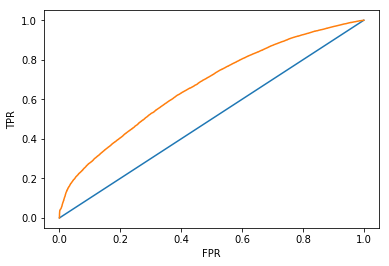

In [51]:
#Logistic Regression
log = LogisticRegression()
log.fit(xtrain,ytrain)
y_score=log.predict_proba(xtest)[:,1]
fpr, tpr,_ = roc_curve(ytest, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
# Plotting our Baseline..
plt.plot([0,1],[0,1])
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')

In [63]:
# # #Cross Validation
kfold = model_selection.KFold(n_splits=10,random_state = 1)
modelCV = LogisticRegression()
results = model_selection.cross_val_score(modelCV, xtrain, ytrain, cv=kfold, scoring='accuracy')
results.mean()

In [88]:
#KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
y_pred = knn.predict(X)
print(metrics.accuracy_score(y, y_pred))

/Users/yanxilu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.750303754111


In [89]:
#Confusion Matrix
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.74      0.72      0.73    111154
          1       0.76      0.78      0.77    129995

avg / total       0.75      0.75      0.75    241149



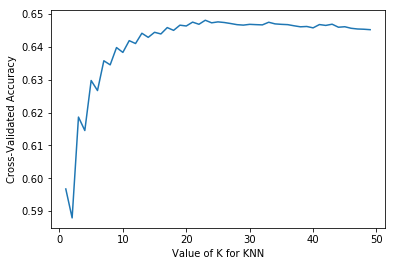

In [81]:
#KNN Parameter Tuning By CV
k_range = list(range(1,50))
k_scores = []
for K in k_range:
    knn = KNeighborsClassifier(n_neighbors=K)
    scores = cross_val_score(knn, X, y.values.reshape((c,)), scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [85]:
#Random Forest
RF = RandomForestClassifier(max_depth=10,n_estimators=100,min_samples_leaf=1,n_jobs=2, random_state=0)
result = RF.fit(xtrain,ytrain)
y_pred = RF.predict(xtest)
metrics.accuracy_score(ytest, y_pred)

/Users/yanxilu/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
